# Movielens Case Study

In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%config IPCompleter.greedy=True

In [3]:
m=pd.read_table('movies.dat',sep='::',header=None,names=["MovieID","Name","Type"])

C:\Users\SaaiM\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [4]:
m

,MovieID,Name,Type
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [5]:
m.Type.unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", 'Action|Drama|Thriller',
       "Children's|Comedy", 'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventur

In [6]:
import re
m["Comedy"] = [re.search("Comedy", m["Type"][i])!=None for i in range(m.shape[0])]
m["Romance"] = [re.search("Romance", m["Type"][i])!=None for i in range(m.shape[0])]
m["Drama"] = [re.search("Drama", m["Type"][i])!=None for i in range(m.shape[0])]
m["Adventure"] = [re.search("Adventure", m["Type"][i])!=None for i in range(m.shape[0])]
m["Fantasy"] = [re.search("Fantasy", m["Type"][i])!=None for i in range(m.shape[0])]
m["Children's"] = [re.search("Children's", m["Type"][i])!=None for i in range(m.shape[0])]
m["War"] = [re.search("War", m["Type"][i])!=None for i in range(m.shape[0])]
m["Horror"] = [re.search("Horror", m["Type"][i])!=None for i in range(m.shape[0])]
m["Sci-Fi"] = [re.search("Sci-Fi", m["Type"][i])!=None for i in range(m.shape[0])]
m["Crime"] = [re.search("Crime", m["Type"][i])!=None for i in range(m.shape[0])]
m["Western"] = [re.search("Western", m["Type"][i])!=None for i in range(m.shape[0])]
m["Musiml"] = [re.search("Musiml", m["Type"][i])!=None for i in range(m.shape[0])]
m["Animation"] = [re.search("Animation", m["Type"][i])!=None for i in range(m.shape[0])]
m["Thriller"] = [re.search("Drama", m["Type"][i])!=None for i in range(m.shape[0])]
m["Mystery"] = [re.search("Mystery", m["Type"][i])!=None for i in range(m.shape[0])]
m["Film-Noir"] = [re.search("Film-Noir", m["Type"][i])!=None for i in range(m.shape[0])]
m["Documentary"] = [re.search("Documentary", m["Type"][i])!=None for i in range(m.shape[0])]
m["Action"] = [re.search("Action", m["Type"][i])!=None for i in range(m.shape[0])]

In [7]:
m

,MovieID,Name,Type,Comedy,Romance,Drama,Adventure,Fantasy,Children's,War,...,Sci-Fi,Crime,Western,Musiml,Animation,Thriller,Mystery,Film-Noir,Documentary,Action
0,1,Toy Story (1995),Animation|Children's|Comedy,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1,2,Jumanji (1995),Adventure|Children's|Fantasy,False,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men (1995),Comedy|Romance,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama,True,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,5,Father of the Bride Part II (1995),Comedy,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3879,3949,Requiem for a Dream (2000),Drama,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3880,3950,Tigerland (2000),Drama,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3881,3951,Two Family House (2000),Drama,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [8]:
m = m.drop(["Type"], axis=1)

In [9]:
m

,MovieID,Name,Comedy,Romance,Drama,Adventure,Fantasy,Children's,War,Horror,Sci-Fi,Crime,Western,Musiml,Animation,Thriller,Mystery,Film-Noir,Documentary,Action
0,1,Toy Story (1995),True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
1,2,Jumanji (1995),False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men (1995),True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,Waiting to Exhale (1995),True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,5,Father of the Bride Part II (1995),True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3879,3949,Requiem for a Dream (2000),False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3880,3950,Tigerland (2000),False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3881,3951,Two Family House (2000),False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [10]:
new = [re.search("([0-9]{4})", m["Name"][i]).group() for i in range(m.shape[0])]
new

['1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1994',
 '1995',
 '1994',
 '1995',
 '1995',
 '1995',
 '1995',
 '1994',
 '1995',
 '1995',
 '1996',
 '1995',
 '1996',
 '1996',
 '1996',
 '1996',
 '1995',
 '1995',
 '1995',
 '1996',
 '1995',
 '1995',
 '1995',
 '1996',
 '1996',
 '1995',
 '1995',
 '1995',
 '1996',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1996',
 '1996',
 '1996',
 '1995',
 '1995',
 '1996',
 '1995',
 '1996',
 '1996',
 '1995',
 '1995',
 '1994',
 '1995',
 '1996',
 '1996',
 '1996',
 '1996',
 '1996',
 '1995',
 '1994',
 '1996',
 '1995',
 '1995',
 '1995',
 '1976',
 '1995',
 

In [11]:
m["Year"] = new

In [12]:
m

,MovieID,Name,Comedy,Romance,Drama,Adventure,Fantasy,Children's,War,Horror,...,Crime,Western,Musiml,Animation,Thriller,Mystery,Film-Noir,Documentary,Action,Year
0,1,Toy Story (1995),True,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,1995
1,2,Jumanji (1995),False,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,1995
2,3,Grumpier Old Men (1995),True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1995
3,4,Waiting to Exhale (1995),True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1995
4,5,Father of the Bride Part II (1995),True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2000
3879,3949,Requiem for a Dream (2000),False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,2000
3880,3950,Tigerland (2000),False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,2000
3881,3951,Two Family House (2000),False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,2000


In [13]:
u=pd.read_table('users.dat',sep='::',header=None,names=["UserID","Gender","Age","Occupation","Zip-code"])

C:\Users\SaaiM\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [14]:
u

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [15]:
r=pd.read_table('ratings.dat',sep='::',header=None,names=["UserID","MovieID","Rating","Timestamp"])

C:\Users\SaaiM\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [16]:
r

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [17]:
#Master_Data = pd.concat(, ignore_index=True)
Master_Data = r.set_index('MovieID').join(m.set_index('MovieID'))

In [18]:
Master_Data

,UserID,Rating,Timestamp,Name,Comedy,Romance,Drama,Adventure,Fantasy,Children's,...,Crime,Western,Musiml,Animation,Thriller,Mystery,Film-Noir,Documentary,Action,Year
MovieID,,,,,,,,,,,,,,,,,,,,,
1,1,5,978824268,Toy Story (1995),True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,1995
1,6,4,978237008,Toy Story (1995),True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,1995
1,8,4,978233496,Toy Story (1995),True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,1995
1,9,5,978225952,Toy Story (1995),True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,1995
1,10,5,978226474,Toy Story (1995),True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,5812,4,992072099,"Contender, The (2000)",False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,2000
3952,5831,3,986223125,"Contender, The (2000)",False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,2000
3952,5837,4,1011902656,"Contender, The (2000)",False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,2000


In [19]:
Master_Data = Master_Data.set_index('UserID').join(u.set_index('UserID'))

In [20]:
Master_Data

,Rating,Timestamp,Name,Comedy,Romance,Drama,Adventure,Fantasy,Children's,War,...,Thriller,Mystery,Film-Noir,Documentary,Action,Year,Gender,Age,Occupation,Zip-code
UserID,,,,,,,,,,,,,,,,,,,,,
1,5,978824268,Toy Story (1995),True,False,False,False,False,True,False,...,False,False,False,False,False,1995,F,1,10,48067
1,5,978824351,Pocahontas (1995),False,True,False,False,False,True,False,...,False,False,False,False,False,1995,F,1,10,48067
1,5,978301777,Apollo 13 (1995),False,False,True,False,False,False,False,...,True,False,False,False,False,1995,F,1,10,48067
1,4,978300760,Star Wars: Episode IV - A New Hope (1977),False,False,False,True,True,False,False,...,False,False,False,False,True,1977,F,1,10,48067
1,5,978824195,Schindler's List (1993),False,False,True,False,False,False,True,...,True,False,False,False,False,1993,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,4,960971696,Blood Simple (1984),False,False,True,False,False,False,False,...,True,False,True,False,False,1984,M,25,6,11106
6040,4,964828575,Mad Max 2 (a.k.a. The Road Warrior) (1981),False,False,False,False,False,False,False,...,False,False,False,False,True,1981,M,25,6,11106
6040,4,960971654,Serpico (1973),False,False,True,False,False,False,False,...,True,False,False,False,False,1973,M,25,6,11106


In [21]:
j=pd.read_table('job.dat',sep='\t',header=None,names=["OccupationID","Occupation"])

In [22]:
j

,OccupationID,Occupation
0,0,other
1,1,academic/educator
2,2,artist”
3,3,clerical/admin
4,4,college/grad student
5,5,customer service
6,6,doctor/health care
7,7,executive/managerial
8,8,farmer
9,9,homemaker


In [23]:
HistogramData = Master_Data.set_index('Occupation').join(j.set_index('OccupationID'))

In [24]:
HistogramData = pd.concat([Master_Data.Rating, Master_Data.Age], axis=1)

In [25]:
HistogramData

,Rating,Age
UserID,,
1,5,1
1,5,1
1,5,1
1,4,1
1,5,1
...,...,...
6040,4,25
6040,4,25
6040,4,25


In [26]:
Master_Data.Rating.unique()

array([5, 4, 3, 1, 2], dtype=int64)

In [27]:
HistogramData.shape

(1000209, 2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000235B05FBE80>,
      dtype=object)

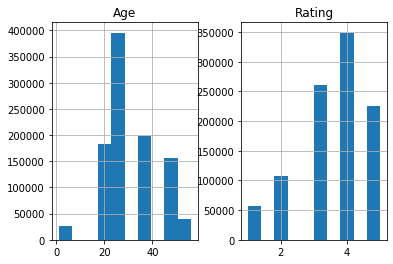

In [28]:
HistogramData.hist() 

In [ ]:
HistogramData.plot.bar() 
  
# plot between 2 attributes 
plt.bar(HistogramData['Age'], HistogramData['Rating']) 
plt.xlabel("Age") 
plt.ylabel("Rating") 
plt.show() 

In [ ]:
# matplotlib histogram
#plt.hist([HistogramData['Age'],HistogramData['Rating']], color = colors, edgecolor = 'black', bins = int(5))
#plt.title('Histogram of Movie Rating')
#plt.xlabel('Age')
#plt.ylabel('Rating')

In [ ]:
# seaborn histogram
#sns.distplot(Master_Data['Age'], hist=True, kde=False, 
             #bins=int(5), color = 'blue',
             #hist_kws={'edgecolor':'black'})
# Add labels
#plt.title('Histogram of Movie Rating')
#plt.xlabel('Age')
#plt.ylabel('Rating')